# Transfer and Portability Studies With AVstack

In [4]:
import sys, os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 
import avstack
import avapi
from copy import copy, deepcopy
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

%load_ext autoreload
%autoreload 2

%matplotlib inline

data_dir_kitti_obj = '/data/spencer/KITTI/object'
data_dir_kitti_raw = '/data/spencer/KITTI/raw'
data_dir_nuscenes = '/data/spencer/nuScenes'
data_dir_carla = '/data/spencer/CARLA/object_test'
data_dir_carla_infra = '/data/spencer/CARLA/object_infrastructure'

KSM = avapi.kitti.KittiScenesManager(data_dir_kitti_obj, data_dir_kitti_raw, convert_raw=False)
NSM = avapi.nuscenes.nuScenesManager(data_dir_nuscenes, split='v1.0-mini')
CSM = avapi.carla.CarlaScenesManager(data_dir_carla, verbose=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
li_perception = {0:'pointpillars',
                 1:'ssn',
                 2:'pointpillars',
                 3:'ssn',
                 4:'pointpillars',
                 5:'ssn'}
ca_perception = {0:None,
                 1:None,
                 2:'fasterrcnn',
                 3:'fasterrcnn',
                 4:'cascade_mask_rcnn',
                 5:'cascade_mask_rcnn'}
tracking = {0:'basic-box-tracker',
            1:'basic-box-tracker',
            2:'basic-box-tracker-fusion-3stage',
            3:'basic-box-tracker-fusion-3stage',
            4:'basic-box-tracker-fusion-3stage',
            5:'basic-box-tracker-fusion-3stage'}
sensor_eval = {0:'main_lidar',
               1:'main_lidar',
               2:'main_camera',
               3:'main_camera',
               4:'main_camera',
               5:'main_camera'}
filter_front = {0:False,
                1:False,
                2:True,
                3:True,
                4:True,
                5:True}

vs = avstack.ego.vehicle
AVs = {0:vs.LidarPerceptionAndTrackingVehicle,
       1:vs.LidarPerceptionAndTrackingVehicle,
       2:vs.LidarCameraPerceptionAndTrackingVehicle,
       3:vs.LidarCameraPerceptionAndTrackingVehicle,
       4:vs.LidarCameraPerceptionAndTrackingVehicle,
       5:vs.LidarCameraPerceptionAndTrackingVehicle}
SMs = [KSM, NSM, CSM]

## Run Tests

In [7]:
frame_res_all, seq_res_all = avapi.evaluation.run_trades(SMs, AVs, li_perception, ca_perception, tracking,
                            sensor_eval=sensor_eval, sensor_eval_super=None, trade_type='standard', 
                            filter_front=filter_front, n_trials_max=3, max_dist=100, n_cases_max=5,
                            max_frames=150, frame_start=1, save_result=True, save_file_base='study-1-{}-seq-res.p',
                           trial_indices=None)

/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


Running dataset Kitti over 3 trials
   Running trial 0, using index 0
load checkpoint from local path: /home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/checkpoints/kitti/hv_pointpillars_secfpn_6x8_160e_kitti-3d-3class_20220301_150306-37dc2420.pth
      Running dataset: KITTI, case 0


100%|█████████████████████████████████████████████████████████████████| 107/107 [00:01<00:00, 77.22it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

31 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0001_sync, box-tracker) 0.6942 sec

All sequences for box-tracker finished in 0.69 seconds


100%|█████████████████████████████████████████████████████████████████| 107/107 [00:06<00:00, 16.28it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 0, 'Dataset': 'KITTI', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 402, 'Metrics_perception_object_3d_tot_FP': 134, 'Metrics_perception_object_3d_tot_FN': 44, 'Metrics_perception_object_3d_tot_T': 446, 'Metrics_perception_object_3d_mean_precision': 0.7629971274831088, 'Metrics_perception_object_3d_mean_recall': 0.8970404984423674, 'Metrics_tracking_HOTA_HOTA': array([0.61158822, 0.61158822, 0.61158822, 0.61158822, 0.61158822,
       0.61158822, 0.61158822, 0.61158822, 0.61158822, 0.61158822,
       0.61158822, 0.61158822, 0.61158822, 0.61158822, 0.61158822,
       0.61158822, 0.61158822, 0.61158822, 0.61158822]), 'Metrics_tracking_HOTA_DetA': array([0.55789474, 0.55789474, 0.55789474, 0.55789474, 0.55789474,
       0.55789474, 0.55789474, 0.55789474, 0.55789474, 0.55789474,
       0.55789474, 0.55789474, 0.55789474, 0.55789474, 0.55789474,
       0.55789474, 0.55789474, 0.55789474, 0.55789474]), 'Metrics_tracking_HOTA_AssA': array([0.67044932, 0.67044932, 0.67044932, 0.

100%|████████████████████████████████████████████████████████████████| 107/107 [00:00<00:00, 119.17it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

32 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0001_sync, box-tracker) 0.5081 sec

All sequences for box-tracker finished in 0.51 seconds


100%|█████████████████████████████████████████████████████████████████| 107/107 [00:04<00:00, 23.41it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'KITTI', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 194, 'Metrics_perception_object_3d_tot_FP': 99, 'Metrics_perception_object_3d_tot_FN': 252, 'Metrics_perception_object_3d_tot_T': 446, 'Metrics_perception_object_3d_mean_precision': 0.5002002670226969, 'Metrics_perception_object_3d_mean_recall': 0.4159991099243435, 'Metrics_tracking_HOTA_HOTA': array([0.40064066, 0.40064066, 0.40064066, 0.40064066, 0.40064066,
       0.40064066, 0.40064066, 0.40064066, 0.40064066, 0.40064066,
       0.40064066, 0.40064066, 0.40064066, 0.40064066, 0.40064066,
       0.40064066, 0.40064066, 0.40064066, 0.40064066]), 'Metrics_tracking_HOTA_DetA': array([0.31891892, 0.31891892, 0.31891892, 0.31891892, 0.31891892,
       0.31891892, 0.31891892, 0.31891892, 0.31891892, 0.31891892,
       0.31891892, 0.31891892, 0.31891892, 0.31891892, 0.31891892,
       0.31891892, 0.31891892, 0.31891892, 0.31891892]), 'Metrics_tracking_HOTA_AssA': array([0.50330329, 0.50330329, 0.50330329, 0.

  0%|                                                                           | 0/107 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████| 107/107 [00:01<00:00, 92.43it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

33 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0001_sync, box-tracker) 0.5629 sec

All sequences for box-tracker finished in 0.56 seconds


100%|█████████████████████████████████████████████████████████████████| 107/107 [00:05<00:00, 19.52it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'KITTI', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 402, 'Metrics_perception_object_3d_tot_FP': 134, 'Metrics_perception_object_3d_tot_FN': 44, 'Metrics_perception_object_3d_tot_T': 446, 'Metrics_perception_object_3d_mean_precision': 0.7629971274831088, 'Metrics_perception_object_3d_mean_recall': 0.8970404984423674, 'Metrics_perception_object_2d_tot_TP': 347, 'Metrics_perception_object_2d_tot_FP': 224, 'Metrics_perception_object_2d_tot_FN': 99, 'Metrics_perception_object_2d_tot_T': 446, 'Metrics_perception_object_2d_mean_precision': 0.6229295626491886, 'Metrics_perception_object_2d_mean_recall': 0.731619937694704, 'Metrics_tracking_HOTA_HOTA': array([0.7120119, 0.7120119, 0.7120119, 0.7120119, 0.7120119, 0.7120119,
       0.7120119, 0.7120119, 0.7120119, 0.7120119, 0.7120119, 0.7120119,
       0.7120119, 0.7120119, 0.7120119, 0.7120119, 0.7120119, 0.7120119,
       0.7120119]), 'Metrics_tracking_HOTA_DetA': array([0.62658228, 0.62658228, 0.62658228, 0.626

  0%|                                                                           | 0/107 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████| 107/107 [00:00<00:00, 131.36it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

34 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0001_sync, box-tracker) 0.4560 sec

All sequences for box-tracker finished in 0.46 seconds


100%|█████████████████████████████████████████████████████████████████| 107/107 [00:03<00:00, 28.02it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'KITTI', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 194, 'Metrics_perception_object_3d_tot_FP': 99, 'Metrics_perception_object_3d_tot_FN': 252, 'Metrics_perception_object_3d_tot_T': 446, 'Metrics_perception_object_3d_mean_precision': 0.5002002670226969, 'Metrics_perception_object_3d_mean_recall': 0.4159991099243435, 'Metrics_perception_object_2d_tot_TP': 347, 'Metrics_perception_object_2d_tot_FP': 224, 'Metrics_perception_object_2d_tot_FN': 99, 'Metrics_perception_object_2d_tot_T': 446, 'Metrics_perception_object_2d_mean_precision': 0.6229295626491886, 'Metrics_perception_object_2d_mean_recall': 0.731619937694704, 'Metrics_tracking_HOTA_HOTA': array([0.48049075, 0.48049075, 0.48049075, 0.48049075, 0.48049075,
       0.48049075, 0.48049075, 0.48049075, 0.48049075, 0.48049075,
       0.48049075, 0.48049075, 0.48049075, 0.48049075, 0.48049075,
       0.48049075, 0.48049075, 0.48049075, 0.48049075]), 'Metrics_tracking_HOTA_DetA': array([0.37124464, 0.37124464

  0%|                                                                           | 0/107 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████| 107/107 [00:01<00:00, 96.33it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

35 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0001_sync, box-tracker) 0.5450 sec

All sequences for box-tracker finished in 0.55 seconds


100%|█████████████████████████████████████████████████████████████████| 107/107 [00:05<00:00, 19.80it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'KITTI', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 402, 'Metrics_perception_object_3d_tot_FP': 134, 'Metrics_perception_object_3d_tot_FN': 44, 'Metrics_perception_object_3d_tot_T': 446, 'Metrics_perception_object_3d_mean_precision': 0.7629971274831088, 'Metrics_perception_object_3d_mean_recall': 0.8970404984423674, 'Metrics_perception_object_2d_tot_TP': 435, 'Metrics_perception_object_2d_tot_FP': 269, 'Metrics_perception_object_2d_tot_FN': 11, 'Metrics_perception_object_2d_tot_T': 446, 'Metrics_perception_object_2d_mean_precision': 0.6305221777184395, 'Metrics_perception_object_2d_mean_recall': 0.97514463729417, 'Metrics_tracking_HOTA_HOTA': array([0.7003656, 0.7003656, 0.7003656, 0.7003656, 0.7003656, 0.7003656,
       0.7003656, 0.7003656, 0.7003656, 0.7003656, 0.7003656, 0.7003656,
       0.7003656, 0.7003656, 0.7003656, 0.7003656, 0.7003656, 0.7003656,
       0.7003656]), 'Metrics_tracking_HOTA_DetA': array([0.59314775, 0.59314775, 0.59314775, 0.5931

100%|██████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 401.84it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

36 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0002_sync, box-tracker) 0.1860 sec

All sequences for box-tracker finished in 0.19 seconds


100%|███████████████████████████████████████████████████████████████████| 76/76 [00:01<00:00, 40.43it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 0, 'Dataset': 'KITTI', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 49, 'Metrics_perception_object_3d_tot_FP': 290, 'Metrics_perception_object_3d_tot_FN': 4, 'Metrics_perception_object_3d_tot_T': 53, 'Metrics_perception_object_3d_mean_precision': 0.18348997493734337, 'Metrics_perception_object_3d_mean_recall': 0.45394736842105265, 'Metrics_tracking_HOTA_HOTA': array([0.17453722, 0.17453722, 0.17453722, 0.17453722, 0.17453722,
       0.17453722, 0.17453722, 0.17453722, 0.17453722, 0.17453722,
       0.17453722, 0.17453722, 0.17453722, 0.17453722, 0.17453722,
       0.17453722, 0.17453722, 0.17453722, 0.17453722]), 'Metrics_tracking_HOTA_DetA': array([0.03323263, 0.03323263, 0.03323263, 0.03323263, 0.03323263,
       0.03323263, 0.03323263, 0.03323263, 0.03323263, 0.03323263,
       0.03323263, 0.03323263, 0.03323263, 0.03323263, 0.03323263,
       0.03323263, 0.03323263, 0.03323263, 0.03323263]), 'Metrics_tracking_HOTA_AssA': array([0.91666667, 0.91666667, 0.91666667, 0.9

100%|██████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 770.47it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

37 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0002_sync, box-tracker) 0.0940 sec

All sequences for box-tracker finished in 0.09 seconds


100%|██████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 186.37it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'KITTI', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 3, 'Metrics_perception_object_3d_tot_FP': 46, 'Metrics_perception_object_3d_tot_FN': 50, 'Metrics_perception_object_3d_tot_T': 53, 'Metrics_perception_object_3d_mean_precision': 0.039473684210526314, 'Metrics_perception_object_3d_mean_recall': 0.039473684210526314, 'Metrics_tracking_HOTA_HOTA': array([0.06688235, 0.06688235, 0.06688235, 0.06688235, 0.06688235,
       0.06688235, 0.06688235, 0.06688235, 0.06688235, 0.06688235,
       0.06688235, 0.06688235, 0.06688235, 0.06688235, 0.06688235,
       0.06688235, 0.06688235, 0.06356417, 0.06356417]), 'Metrics_tracking_HOTA_DetA': array([0.03370787, 0.03370787, 0.03370787, 0.03370787, 0.03370787,
       0.03370787, 0.03370787, 0.03370787, 0.03370787, 0.03370787,
       0.03370787, 0.03370787, 0.03370787, 0.03370787, 0.03370787,
       0.03370787, 0.03370787, 0.02222222, 0.02222222]), 'Metrics_tracking_HOTA_AssA': array([0.13270637, 0.13270637, 0.13270637, 0.

  0%|                                                                            | 0/76 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 441.87it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

38 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0002_sync, box-tracker) 0.1047 sec

All sequences for box-tracker finished in 0.10 seconds


100%|███████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 83.47it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'KITTI', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 49, 'Metrics_perception_object_3d_tot_FP': 290, 'Metrics_perception_object_3d_tot_FN': 4, 'Metrics_perception_object_3d_tot_T': 53, 'Metrics_perception_object_3d_mean_precision': 0.18348997493734337, 'Metrics_perception_object_3d_mean_recall': 0.45394736842105265, 'Metrics_perception_object_2d_tot_TP': 51, 'Metrics_perception_object_2d_tot_FP': 287, 'Metrics_perception_object_2d_tot_FN': 2, 'Metrics_perception_object_2d_tot_T': 53, 'Metrics_perception_object_2d_mean_precision': 0.1985645933014354, 'Metrics_perception_object_2d_mean_recall': 0.48026315789473684, 'Metrics_tracking_HOTA_HOTA': array([0.8330952, 0.8330952, 0.8330952, 0.8330952, 0.8330952, 0.8330952,
       0.8330952, 0.8330952, 0.8330952, 0.8330952, 0.8330952, 0.8330952,
       0.8330952, 0.8330952, 0.8330952, 0.8330952, 0.8330952, 0.8330952,
       0.8330952]), 'Metrics_tracking_HOTA_DetA': array([0.81034483, 0.81034483, 0.81034483, 0.81034

  0%|                                                                            | 0/76 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 1006.83it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

39 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0002_sync, box-tracker) 0.0743 sec

All sequences for box-tracker finished in 0.07 seconds


100%|█████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 1177.74it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'KITTI', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 3, 'Metrics_perception_object_3d_tot_FP': 46, 'Metrics_perception_object_3d_tot_FN': 50, 'Metrics_perception_object_3d_tot_T': 53, 'Metrics_perception_object_3d_mean_precision': 0.039473684210526314, 'Metrics_perception_object_3d_mean_recall': 0.039473684210526314, 'Metrics_perception_object_2d_tot_TP': 51, 'Metrics_perception_object_2d_tot_FP': 287, 'Metrics_perception_object_2d_tot_FN': 2, 'Metrics_perception_object_2d_tot_T': 53, 'Metrics_perception_object_2d_mean_precision': 0.1985645933014354, 'Metrics_perception_object_2d_mean_recall': 0.48026315789473684, 'Metrics_tracking_HOTA_HOTA': array([0.08283154, 0.08283154, 0.08283154, 0.08283154, 0.08283154,
       0.08283154, 0.08283154, 0.08283154, 0.08283154, 0.08283154,
       0.08283154, 0.08283154, 0.08283154, 0.08283154, 0.08283154,
       0.08283154, 0.08283154, 0.08283154, 0.08283154]), 'Metrics_tracking_HOTA_DetA': array([0.03773585, 0.03773585,

  0%|                                                                            | 0/76 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 445.00it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

40 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0002_sync, box-tracker) 0.1049 sec

All sequences for box-tracker finished in 0.11 seconds


100%|██████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 119.18it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'KITTI', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 49, 'Metrics_perception_object_3d_tot_FP': 290, 'Metrics_perception_object_3d_tot_FN': 4, 'Metrics_perception_object_3d_tot_T': 53, 'Metrics_perception_object_3d_mean_precision': 0.18348997493734337, 'Metrics_perception_object_3d_mean_recall': 0.45394736842105265, 'Metrics_perception_object_2d_tot_TP': 50, 'Metrics_perception_object_2d_tot_FP': 200, 'Metrics_perception_object_2d_tot_FN': 3, 'Metrics_perception_object_2d_tot_T': 53, 'Metrics_perception_object_2d_mean_precision': 0.2061617110959216, 'Metrics_perception_object_2d_mean_recall': 0.47368421052631576, 'Metrics_tracking_HOTA_HOTA': array([0.81909261, 0.81909261, 0.81909261, 0.81909261, 0.81909261,
       0.81909261, 0.81909261, 0.81909261, 0.81909261, 0.81909261,
       0.81909261, 0.81909261, 0.81909261, 0.81909261, 0.81909261,
       0.81909261, 0.81909261, 0.81909261, 0.81909261]), 'Metrics_tracking_HOTA_DetA': array([0.78333333, 0.78333333, 

100%|█████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 64.08it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

41 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0005_sync, box-tracker) 1.2073 sec

All sequences for box-tracker finished in 1.21 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 13.83it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 0, 'Dataset': 'KITTI', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 349, 'Metrics_perception_object_3d_tot_FP': 466, 'Metrics_perception_object_3d_tot_FN': 25, 'Metrics_perception_object_3d_tot_T': 374, 'Metrics_perception_object_3d_mean_precision': 0.3715069375069373, 'Metrics_perception_object_3d_mean_recall': 0.9036111111111113, 'Metrics_tracking_HOTA_HOTA': array([0.52430929, 0.52430929, 0.52430929, 0.52430929, 0.52430929,
       0.52430929, 0.52430929, 0.52430929, 0.52430929, 0.52430929,
       0.52430929, 0.52430929, 0.52430929, 0.52430929, 0.52430929,
       0.52430929, 0.52430929, 0.52430929, 0.52430929]), 'Metrics_tracking_HOTA_DetA': array([0.47302905, 0.47302905, 0.47302905, 0.47302905, 0.47302905,
       0.47302905, 0.47302905, 0.47302905, 0.47302905, 0.47302905,
       0.47302905, 0.47302905, 0.47302905, 0.47302905, 0.47302905,
       0.47302905, 0.47302905, 0.47302905, 0.47302905]), 'Metrics_tracking_HOTA_AssA': array([0.58114873, 0.58114873, 0.58114873, 0.

100%|█████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 86.76it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

42 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0005_sync, box-tracker) 0.8547 sec

All sequences for box-tracker finished in 0.85 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:09<00:00, 15.85it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'KITTI', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 211, 'Metrics_perception_object_3d_tot_FP': 296, 'Metrics_perception_object_3d_tot_FN': 163, 'Metrics_perception_object_3d_tot_T': 374, 'Metrics_perception_object_3d_mean_precision': 0.24555844155844156, 'Metrics_perception_object_3d_mean_recall': 0.39082275132275135, 'Metrics_tracking_HOTA_HOTA': array([0.42032302, 0.42032302, 0.42032302, 0.42032302, 0.42032302,
       0.42032302, 0.42032302, 0.42032302, 0.42032302, 0.42032302,
       0.42032302, 0.42032302, 0.42032302, 0.42032302, 0.42032302,
       0.42032302, 0.42032302, 0.42032302, 0.42032302]), 'Metrics_tracking_HOTA_DetA': array([0.33176101, 0.33176101, 0.33176101, 0.33176101, 0.33176101,
       0.33176101, 0.33176101, 0.33176101, 0.33176101, 0.33176101,
       0.33176101, 0.33176101, 0.33176101, 0.33176101, 0.33176101,
       0.33176101, 0.33176101, 0.33176101, 0.33176101]), 'Metrics_tracking_HOTA_AssA': array([0.53252623, 0.53252623, 0.53252623,

  0%|                                                                           | 0/150 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 121.90it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

43 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0005_sync, box-tracker) 0.6544 sec

All sequences for box-tracker finished in 0.65 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:06<00:00, 23.37it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'KITTI', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 349, 'Metrics_perception_object_3d_tot_FP': 466, 'Metrics_perception_object_3d_tot_FN': 25, 'Metrics_perception_object_3d_tot_T': 374, 'Metrics_perception_object_3d_mean_precision': 0.3715069375069373, 'Metrics_perception_object_3d_mean_recall': 0.9036111111111113, 'Metrics_perception_object_2d_tot_TP': 360, 'Metrics_perception_object_2d_tot_FP': 712, 'Metrics_perception_object_2d_tot_FN': 14, 'Metrics_perception_object_2d_tot_T': 374, 'Metrics_perception_object_2d_mean_precision': 0.30529107004107003, 'Metrics_perception_object_2d_mean_recall': 0.975, 'Metrics_tracking_HOTA_HOTA': array([0.5247158 , 0.5247158 , 0.5247158 , 0.5247158 , 0.5247158 ,
       0.5247158 , 0.5247158 , 0.5247158 , 0.5247158 , 0.5247158 ,
       0.5247158 , 0.5247158 , 0.52203924, 0.52203924, 0.52203924,
       0.52203924, 0.52203924, 0.52203924, 0.52203924]), 'Metrics_tracking_HOTA_DetA': array([0.38716814, 0.38716814, 0.3871681

  0%|                                                                           | 0/150 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 104.69it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

44 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0005_sync, box-tracker) 0.7092 sec

All sequences for box-tracker finished in 0.71 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:09<00:00, 16.00it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'KITTI', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 211, 'Metrics_perception_object_3d_tot_FP': 296, 'Metrics_perception_object_3d_tot_FN': 163, 'Metrics_perception_object_3d_tot_T': 374, 'Metrics_perception_object_3d_mean_precision': 0.24555844155844156, 'Metrics_perception_object_3d_mean_recall': 0.39082275132275135, 'Metrics_perception_object_2d_tot_TP': 360, 'Metrics_perception_object_2d_tot_FP': 712, 'Metrics_perception_object_2d_tot_FN': 14, 'Metrics_perception_object_2d_tot_T': 374, 'Metrics_perception_object_2d_mean_precision': 0.30529107004107003, 'Metrics_perception_object_2d_mean_recall': 0.975, 'Metrics_tracking_HOTA_HOTA': array([0.46701212, 0.46701212, 0.46701212, 0.46701212, 0.46701212,
       0.46701212, 0.46701212, 0.46701212, 0.46701212, 0.46374765,
       0.46082803, 0.45821455, 0.45821455, 0.45821455, 0.45821455,
       0.45821455, 0.45821455, 0.45821455, 0.45331005]), 'Metrics_tracking_HOTA_DetA': array([0.45626478, 0.45626478, 0.4562

  0%|                                                                           | 0/150 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 94.22it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

45 eval_sequence(/data/spencer/KITTI/object/2011_09_26_drive_0005_sync, box-tracker) 1.0802 sec

All sequences for box-tracker finished in 1.08 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:08<00:00, 18.61it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'KITTI', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 349, 'Metrics_perception_object_3d_tot_FP': 466, 'Metrics_perception_object_3d_tot_FN': 25, 'Metrics_perception_object_3d_tot_T': 374, 'Metrics_perception_object_3d_mean_precision': 0.3715069375069373, 'Metrics_perception_object_3d_mean_recall': 0.9036111111111113, 'Metrics_perception_object_2d_tot_TP': 364, 'Metrics_perception_object_2d_tot_FP': 696, 'Metrics_perception_object_2d_tot_FN': 10, 'Metrics_perception_object_2d_tot_T': 374, 'Metrics_perception_object_2d_mean_precision': 0.29253809153809157, 'Metrics_perception_object_2d_mean_recall': 0.9501481481481481, 'Metrics_tracking_HOTA_HOTA': array([0.63672368, 0.63672368, 0.63672368, 0.63672368, 0.63672368,
       0.63672368, 0.63672368, 0.63672368, 0.63672368, 0.63672368,
       0.63672368, 0.63672368, 0.63672368, 0.63672368, 0.63672368,
       0.63672368, 0.63672368, 0.63672368, 0.63672368]), 'Metrics_tracking_HOTA_DetA': array([0.68530021, 0.685300

100%|███████████████████████████████████████████████████████████████████| 38/38 [00:04<00:00,  8.04it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

46 eval_sequence(scene-0061, box-tracker)                                 2.5370 sec

All sequences for box-tracker finished in 2.54 seconds


100%|███████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.25it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 0, 'Dataset': 'nuScenes', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 153, 'Metrics_perception_object_3d_tot_FP': 4, 'Metrics_perception_object_3d_tot_FN': 499, 'Metrics_perception_object_3d_tot_T': 652, 'Metrics_perception_object_3d_mean_precision': 0.9736842105263158, 'Metrics_perception_object_3d_mean_recall': 0.25427641402466233, 'Metrics_tracking_HOTA_HOTA': array([0.09376593, 0.09376593, 0.09376593, 0.09376593, 0.09376593,
       0.09376593, 0.09376593, 0.09376593, 0.09376593, 0.09376593,
       0.09376593, 0.09376593, 0.09376593, 0.09376593, 0.09376593,
       0.09376593, 0.09376593, 0.09376593, 0.09376593]), 'Metrics_tracking_HOTA_DetA': array([0.1116208, 0.1116208, 0.1116208, 0.1116208, 0.1116208, 0.1116208,
       0.1116208, 0.1116208, 0.1116208, 0.1116208, 0.1116208, 0.1116208,
       0.1116208, 0.1116208, 0.1116208, 0.1116208, 0.1116208, 0.1116208,
       0.1116208]), 'Metrics_tracking_HOTA_AssA': array([0.07876712, 0.07876712, 0.07876712, 0.07876712, 0.0787

100%|███████████████████████████████████████████████████████████████████| 38/38 [00:04<00:00,  9.12it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

47 eval_sequence(scene-0061, box-tracker)                                 2.4447 sec

All sequences for box-tracker finished in 2.45 seconds


100%|███████████████████████████████████████████████████████████████████| 38/38 [00:08<00:00,  4.73it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'nuScenes', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 117, 'Metrics_perception_object_3d_tot_FP': 1, 'Metrics_perception_object_3d_tot_FN': 535, 'Metrics_perception_object_3d_tot_T': 652, 'Metrics_perception_object_3d_mean_precision': 0.9649122807017543, 'Metrics_perception_object_3d_mean_recall': 0.19203153454008923, 'Metrics_tracking_HOTA_HOTA': array([0.08528845, 0.08528845, 0.08528845, 0.08528845, 0.08528845,
       0.08528845, 0.08528845, 0.08528845, 0.08528845, 0.08528845,
       0.08528845, 0.08528845, 0.08528845, 0.08528845, 0.08528845,
       0.08528845, 0.08528845, 0.08528845, 0.08528845]), 'Metrics_tracking_HOTA_DetA': array([0.08882083, 0.08882083, 0.08882083, 0.08882083, 0.08882083,
       0.08882083, 0.08882083, 0.08882083, 0.08882083, 0.08882083,
       0.08882083, 0.08882083, 0.08882083, 0.08882083, 0.08882083,
       0.08882083, 0.08882083, 0.08882083, 0.08882083]), 'Metrics_tracking_HOTA_AssA': array([0.08189655, 0.08189655, 0.08189655,

  0%|                                                                            | 0/38 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████| 38/38 [00:02<00:00, 17.63it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

48 eval_sequence(scene-0061, box-tracker)                                 1.8768 sec

All sequences for box-tracker finished in 1.88 seconds


100%|███████████████████████████████████████████████████████████████████| 38/38 [00:05<00:00,  7.28it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'nuScenes', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 67, 'Metrics_perception_object_3d_tot_FP': 28, 'Metrics_perception_object_3d_tot_FN': 180, 'Metrics_perception_object_3d_tot_T': 247, 'Metrics_perception_object_3d_mean_precision': 0.7320175438596492, 'Metrics_perception_object_3d_mean_recall': 0.3155378247483511, 'Metrics_perception_object_2d_tot_TP': 130, 'Metrics_perception_object_2d_tot_FP': 3, 'Metrics_perception_object_2d_tot_FN': 117, 'Metrics_perception_object_2d_tot_T': 247, 'Metrics_perception_object_2d_mean_precision': 0.9786967418546366, 'Metrics_perception_object_2d_mean_recall': 0.5076569629201206, 'Metrics_tracking_HOTA_HOTA': array([0.11489125, 0.11489125, 0.11489125, 0.11489125, 0.11489125,
       0.11489125, 0.11489125, 0.11489125, 0.11489125, 0.11489125,
       0.11489125, 0.11489125, 0.11489125, 0.11489125, 0.11489125,
       0.11489125, 0.11489125, 0.11489125, 0.11489125]), 'Metrics_tracking_HOTA_DetA': array([0.124, 0.124, 0.124,

  0%|                                                                            | 0/38 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████| 38/38 [00:02<00:00, 18.31it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

49 eval_sequence(scene-0061, box-tracker)                                 1.8342 sec

All sequences for box-tracker finished in 1.83 seconds


100%|███████████████████████████████████████████████████████████████████| 38/38 [00:04<00:00,  7.61it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'nuScenes', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 50, 'Metrics_perception_object_3d_tot_FP': 21, 'Metrics_perception_object_3d_tot_FN': 197, 'Metrics_perception_object_3d_tot_T': 247, 'Metrics_perception_object_3d_mean_precision': 0.6929824561403509, 'Metrics_perception_object_3d_mean_recall': 0.2586889718468666, 'Metrics_perception_object_2d_tot_TP': 130, 'Metrics_perception_object_2d_tot_FP': 3, 'Metrics_perception_object_2d_tot_FN': 117, 'Metrics_perception_object_2d_tot_T': 247, 'Metrics_perception_object_2d_mean_precision': 0.9786967418546366, 'Metrics_perception_object_2d_mean_recall': 0.5076569629201206, 'Metrics_tracking_HOTA_HOTA': array([0.09449112, 0.09449112, 0.09449112, 0.09449112, 0.09449112,
       0.09449112, 0.09449112, 0.09449112, 0.09449112, 0.09449112,
       0.09449112, 0.09449112, 0.09449112, 0.09449112, 0.09449112,
       0.09449112, 0.09449112, 0.09449112, 0.09449112]), 'Metrics_tracking_HOTA_DetA': array([0.08730159, 0.087301

  0%|                                                                            | 0/38 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████| 38/38 [00:02<00:00, 17.52it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

50 eval_sequence(scene-0061, box-tracker)                                 1.8583 sec

All sequences for box-tracker finished in 1.86 seconds


100%|███████████████████████████████████████████████████████████████████| 38/38 [00:05<00:00,  7.27it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'nuScenes', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 67, 'Metrics_perception_object_3d_tot_FP': 28, 'Metrics_perception_object_3d_tot_FN': 180, 'Metrics_perception_object_3d_tot_T': 247, 'Metrics_perception_object_3d_mean_precision': 0.7320175438596492, 'Metrics_perception_object_3d_mean_recall': 0.3155378247483511, 'Metrics_perception_object_2d_tot_TP': 167, 'Metrics_perception_object_2d_tot_FP': 52, 'Metrics_perception_object_2d_tot_FN': 80, 'Metrics_perception_object_2d_tot_T': 247, 'Metrics_perception_object_2d_mean_precision': 0.785471107839529, 'Metrics_perception_object_2d_mean_recall': 0.6806829135776504, 'Metrics_tracking_HOTA_HOTA': array([0.11577813, 0.11577813, 0.11577813, 0.11577813, 0.11577813,
       0.11577813, 0.11577813, 0.11577813, 0.11577813, 0.11577813,
       0.11577813, 0.11577813, 0.11577813, 0.11577813, 0.11577813,
       0.11577813, 0.11577813, 0.11577813, 0.11577813]), 'Metrics_tracking_HOTA_DetA': array([0.12598425, 0.1259842

100%|███████████████████████████████████████████████████████████████████| 39/39 [00:05<00:00,  7.56it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

51 eval_sequence(scene-0103, box-tracker)                                 2.1516 sec

All sequences for box-tracker finished in 2.15 seconds


100%|███████████████████████████████████████████████████████████████████| 39/39 [00:06<00:00,  5.62it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 0, 'Dataset': 'nuScenes', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 433, 'Metrics_perception_object_3d_tot_FP': 8, 'Metrics_perception_object_3d_tot_FN': 626, 'Metrics_perception_object_3d_tot_T': 1059, 'Metrics_perception_object_3d_mean_precision': 0.987606008872977, 'Metrics_perception_object_3d_mean_recall': 0.40510179852974637, 'Metrics_tracking_HOTA_HOTA': array([0.18654672, 0.18654672, 0.18654672, 0.18654672, 0.18654672,
       0.18654672, 0.18654672, 0.18654672, 0.18654672, 0.18654672,
       0.18654672, 0.18654672, 0.18654672, 0.18654672, 0.18654672,
       0.18596417, 0.18525631, 0.18525631, 0.18525631]), 'Metrics_tracking_HOTA_DetA': array([0.29047179, 0.29047179, 0.29047179, 0.29047179, 0.29047179,
       0.29047179, 0.29047179, 0.29047179, 0.29047179, 0.29047179,
       0.29047179, 0.29047179, 0.29047179, 0.29047179, 0.29047179,
       0.28927911, 0.28808864, 0.28808864, 0.28808864]), 'Metrics_tracking_HOTA_AssA': array([0.11980399, 0.11980399, 0.11980399,

100%|███████████████████████████████████████████████████████████████████| 39/39 [00:03<00:00, 10.09it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

52 eval_sequence(scene-0103, box-tracker)                                 1.8395 sec

All sequences for box-tracker finished in 1.84 seconds


100%|███████████████████████████████████████████████████████████████████| 39/39 [00:05<00:00,  6.99it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'nuScenes', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 319, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 740, 'Metrics_perception_object_3d_tot_T': 1059, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.2953861580131728, 'Metrics_tracking_HOTA_HOTA': array([0.15967389, 0.15967389, 0.15967389, 0.15967389, 0.15967389,
       0.15967389, 0.15967389, 0.15967389, 0.15967389, 0.15967389,
       0.15967389, 0.15967389, 0.15967389, 0.15967389, 0.15967389,
       0.15967389, 0.15885795, 0.15885795, 0.15885795]), 'Metrics_tracking_HOTA_DetA': array([0.20868744, 0.20868744, 0.20868744, 0.20868744, 0.20868744,
       0.20868744, 0.20868744, 0.20868744, 0.20868744, 0.20868744,
       0.20868744, 0.20868744, 0.20868744, 0.20868744, 0.20868744,
       0.20868744, 0.20754717, 0.20754717, 0.20754717]), 'Metrics_tracking_HOTA_AssA': array([0.12217195, 0.12217195, 0.12217195, 0.12217195, 0.

  0%|                                                                            | 0/39 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 24.88it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

53 eval_sequence(scene-0103, box-tracker)                                 1.0871 sec

All sequences for box-tracker finished in 1.09 seconds


100%|███████████████████████████████████████████████████████████████████| 39/39 [00:02<00:00, 13.28it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'nuScenes', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 171, 'Metrics_perception_object_3d_tot_FP': 91, 'Metrics_perception_object_3d_tot_FN': 381, 'Metrics_perception_object_3d_tot_T': 552, 'Metrics_perception_object_3d_mean_precision': 0.6860610899072439, 'Metrics_perception_object_3d_mean_recall': 0.3314521835375661, 'Metrics_perception_object_2d_tot_TP': 386, 'Metrics_perception_object_2d_tot_FP': 53, 'Metrics_perception_object_2d_tot_FN': 166, 'Metrics_perception_object_2d_tot_T': 552, 'Metrics_perception_object_2d_mean_precision': 0.881937364629672, 'Metrics_perception_object_2d_mean_recall': 0.7489813731673853, 'Metrics_tracking_HOTA_HOTA': array([0.15283032, 0.15283032, 0.15283032, 0.15283032, 0.15283032,
       0.15283032, 0.15283032, 0.15283032, 0.15283032, 0.15283032,
       0.15283032, 0.15283032, 0.15283032, 0.15283032, 0.15283032,
       0.15283032, 0.15283032, 0.15283032, 0.15283032]), 'Metrics_tracking_HOTA_DetA': array([0.19270833, 0.19270

  0%|                                                                            | 0/39 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 29.46it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

54 eval_sequence(scene-0103, box-tracker)                                 1.0740 sec

All sequences for box-tracker finished in 1.07 seconds


100%|███████████████████████████████████████████████████████████████████| 39/39 [00:02<00:00, 15.63it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'nuScenes', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 123, 'Metrics_perception_object_3d_tot_FP': 61, 'Metrics_perception_object_3d_tot_FN': 429, 'Metrics_perception_object_3d_tot_T': 552, 'Metrics_perception_object_3d_mean_precision': 0.6696275946275946, 'Metrics_perception_object_3d_mean_recall': 0.23704045715653038, 'Metrics_perception_object_2d_tot_TP': 386, 'Metrics_perception_object_2d_tot_FP': 53, 'Metrics_perception_object_2d_tot_FN': 166, 'Metrics_perception_object_2d_tot_T': 552, 'Metrics_perception_object_2d_mean_precision': 0.881937364629672, 'Metrics_perception_object_2d_mean_recall': 0.7489813731673853, 'Metrics_tracking_HOTA_HOTA': array([0.1295725, 0.1295725, 0.1295725, 0.1287113, 0.1287113, 0.1287113,
       0.1287113, 0.1287113, 0.1287113, 0.1287113, 0.1287113, 0.1287113,
       0.1287113, 0.1287113, 0.1287113, 0.1287113, 0.1287113, 0.1287113,
       0.1287113]), 'Metrics_tracking_HOTA_DetA': array([0.11498258, 0.11498258, 0.11498258, 0

  0%|                                                                            | 0/39 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 24.79it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

55 eval_sequence(scene-0103, box-tracker)                                 1.0793 sec

All sequences for box-tracker finished in 1.08 seconds


100%|███████████████████████████████████████████████████████████████████| 39/39 [00:03<00:00, 12.73it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'nuScenes', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 171, 'Metrics_perception_object_3d_tot_FP': 91, 'Metrics_perception_object_3d_tot_FN': 381, 'Metrics_perception_object_3d_tot_T': 552, 'Metrics_perception_object_3d_mean_precision': 0.6860610899072439, 'Metrics_perception_object_3d_mean_recall': 0.3314521835375661, 'Metrics_perception_object_2d_tot_TP': 471, 'Metrics_perception_object_2d_tot_FP': 220, 'Metrics_perception_object_2d_tot_FN': 81, 'Metrics_perception_object_2d_tot_T': 552, 'Metrics_perception_object_2d_mean_precision': 0.6761565164964783, 'Metrics_perception_object_2d_mean_recall': 0.8777752822952508, 'Metrics_tracking_HOTA_HOTA': array([0.16254566, 0.16254566, 0.16254566, 0.16254566, 0.16254566,
       0.16254566, 0.16254566, 0.16254566, 0.16254566, 0.16254566,
       0.16254566, 0.16254566, 0.16254566, 0.16254566, 0.16254566,
       0.16254566, 0.16254566, 0.16254566, 0.16254566]), 'Metrics_tracking_HOTA_DetA': array([0.19022688, 0.1902

100%|███████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.83it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

56 eval_sequence(scene-0553, box-tracker)                                 1.2554 sec

All sequences for box-tracker finished in 1.26 seconds


100%|███████████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  9.83it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 0, 'Dataset': 'nuScenes', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 192, 'Metrics_perception_object_3d_tot_FP': 1, 'Metrics_perception_object_3d_tot_FN': 574, 'Metrics_perception_object_3d_tot_T': 766, 'Metrics_perception_object_3d_mean_precision': 0.9964285714285716, 'Metrics_perception_object_3d_mean_recall': 0.25368692283565586, 'Metrics_tracking_HOTA_HOTA': array([0.11425774, 0.11425774, 0.11425774, 0.11425774, 0.11425774,
       0.11425774, 0.11425774, 0.11425774, 0.11425774, 0.11425774,
       0.11425774, 0.11425774, 0.11425774, 0.11425774, 0.11425774,
       0.11425774, 0.11425774, 0.11425774, 0.11425774]), 'Metrics_tracking_HOTA_DetA': array([0.19712794, 0.19712794, 0.19712794, 0.19712794, 0.19712794,
       0.19712794, 0.19712794, 0.19712794, 0.19712794, 0.19712794,
       0.19712794, 0.19712794, 0.19712794, 0.19712794, 0.19712794,
       0.19712794, 0.19712794, 0.19712794, 0.19712794]), 'Metrics_tracking_HOTA_AssA': array([0.06622517, 0.06622517, 0.06622517,

100%|███████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 22.21it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

57 eval_sequence(scene-0553, box-tracker)                                 1.2409 sec

All sequences for box-tracker finished in 1.24 seconds


100%|███████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 10.33it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'nuScenes', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 123, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 643, 'Metrics_perception_object_3d_tot_T': 766, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.1618044053198936, 'Metrics_tracking_HOTA_HOTA': array([0.07226294, 0.07226294, 0.07226294, 0.07226294, 0.07226294,
       0.07226294, 0.07226294, 0.07226294, 0.07226294, 0.07226294,
       0.07226294, 0.07226294, 0.07226294, 0.07226294, 0.07226294,
       0.07226294, 0.07226294, 0.07226294, 0.07226294]), 'Metrics_tracking_HOTA_DetA': array([0.11749347, 0.11749347, 0.11749347, 0.11749347, 0.11749347,
       0.11749347, 0.11749347, 0.11749347, 0.11749347, 0.11749347,
       0.11749347, 0.11749347, 0.11749347, 0.11749347, 0.11749347,
       0.11749347, 0.11749347, 0.11749347, 0.11749347]), 'Metrics_tracking_HOTA_AssA': array([0.04444444, 0.04444444, 0.04444444, 0.04444444, 0.0

  0%|                                                                            | 0/40 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 48.57it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

58 eval_sequence(scene-0553, box-tracker)                                 0.8459 sec

All sequences for box-tracker finished in 0.85 seconds


100%|███████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 70.58it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'nuScenes', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 47, 'Metrics_perception_object_3d_tot_FP': 69, 'Metrics_perception_object_3d_tot_FN': 92, 'Metrics_perception_object_3d_tot_T': 139, 'Metrics_perception_object_3d_mean_precision': 0.33125, 'Metrics_perception_object_3d_mean_recall': 0.2825595238095238, 'Metrics_perception_object_2d_tot_TP': 73, 'Metrics_perception_object_2d_tot_FP': 0, 'Metrics_perception_object_2d_tot_FN': 66, 'Metrics_perception_object_2d_tot_T': 139, 'Metrics_perception_object_2d_mean_precision': 0.9, 'Metrics_perception_object_2d_mean_recall': 0.5198214285714287, 'Metrics_tracking_HOTA_HOTA': array([0.06321395, 0.06321395, 0.06321395, 0.06321395, 0.06321395,
       0.06321395, 0.06321395, 0.06321395, 0.06321395, 0.06321395,
       0.06321395, 0.06321395, 0.06321395, 0.06321395, 0.06321395,
       0.06321395, 0.06321395, 0.06321395, 0.06321395]), 'Metrics_tracking_HOTA_DetA': array([0.02797203, 0.02797203, 0.02797203, 0.02797203, 0

  0%|                                                                            | 0/40 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 51.07it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

59 eval_sequence(scene-0553, box-tracker)                                 0.7775 sec

All sequences for box-tracker finished in 0.78 seconds


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 147.50it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'nuScenes', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 30, 'Metrics_perception_object_3d_tot_FP': 53, 'Metrics_perception_object_3d_tot_FN': 109, 'Metrics_perception_object_3d_tot_T': 139, 'Metrics_perception_object_3d_mean_precision': 0.27291666666666664, 'Metrics_perception_object_3d_mean_recall': 0.18630952380952379, 'Metrics_perception_object_2d_tot_TP': 73, 'Metrics_perception_object_2d_tot_FP': 0, 'Metrics_perception_object_2d_tot_FN': 66, 'Metrics_perception_object_2d_tot_T': 139, 'Metrics_perception_object_2d_mean_precision': 0.9, 'Metrics_perception_object_2d_mean_recall': 0.5198214285714287, 'Metrics_tracking_HOTA_HOTA': array([0.05954913, 0.05954913, 0.05954913, 0.05954913, 0.05954913,
       0.05954913, 0.05954913, 0.05954913, 0.05954913, 0.05954913,
       0.05954913, 0.05954913, 0.05954913, 0.05954913, 0.05954913,
       0.05954913, 0.05954913, 0.05954913, 0.05954913]), 'Metrics_tracking_HOTA_DetA': array([0.0141844, 0.0141844, 0.0141844, 0.

  0%|                                                                            | 0/40 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 49.07it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

60 eval_sequence(scene-0553, box-tracker)                                 0.7807 sec

All sequences for box-tracker finished in 0.78 seconds


100%|███████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 48.41it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'nuScenes', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 47, 'Metrics_perception_object_3d_tot_FP': 69, 'Metrics_perception_object_3d_tot_FN': 92, 'Metrics_perception_object_3d_tot_T': 139, 'Metrics_perception_object_3d_mean_precision': 0.33125, 'Metrics_perception_object_3d_mean_recall': 0.2825595238095238, 'Metrics_perception_object_2d_tot_TP': 103, 'Metrics_perception_object_2d_tot_FP': 27, 'Metrics_perception_object_2d_tot_FN': 36, 'Metrics_perception_object_2d_tot_T': 139, 'Metrics_perception_object_2d_mean_precision': 0.7845833333333333, 'Metrics_perception_object_2d_mean_recall': 0.7223809523809523, 'Metrics_tracking_HOTA_HOTA': array([0.10684346, 0.10684346, 0.10684346, 0.0952381 , 0.0952381 ,
       0.0952381 , 0.0952381 , 0.0952381 , 0.0887856 , 0.0887856 ,
       0.0887856 , 0.0887856 , 0.0887856 , 0.0887856 , 0.0887856 ,
       0.0887856 , 0.0887856 , 0.0887856 , 0.0887856 ]), 'Metrics_tracking_HOTA_DetA': array([0.05479452, 0.05479452, 0.054794

100%|█████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 13.91it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

61 eval_sequence(run_2022_10_28_09:50:35, box-tracker)                    4.2030 sec

All sequences for box-tracker finished in 4.20 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [01:11<00:00,  2.10it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 0, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 1186, 'Metrics_perception_object_3d_tot_FP': 10, 'Metrics_perception_object_3d_tot_FN': 378, 'Metrics_perception_object_3d_tot_T': 1564, 'Metrics_perception_object_3d_mean_precision': 0.9926796536796538, 'Metrics_perception_object_3d_mean_recall': 0.7615765308536206, 'Metrics_tracking_HOTA_HOTA': array([0.45048644, 0.44950122, 0.44950122, 0.44862633, 0.44862633,
       0.44862633, 0.44853702, 0.44853702, 0.44853702, 0.44853702,
       0.44853702, 0.44853702, 0.44853702, 0.44853702, 0.44853702,
       0.44853702, 0.44853702, 0.44853702, 0.44853702]), 'Metrics_tracking_HOTA_DetA': array([0.43931257, 0.43879742, 0.43879742, 0.43828265, 0.43828265,
       0.43828265, 0.43776824, 0.43776824, 0.43776824, 0.43776824,
       0.43776824, 0.43776824, 0.43776824, 0.43776824, 0.43776824,
       0.43776824, 0.43776824, 0.43776824, 0.43776824]), 'Metrics_tracking_HOTA_AssA': array([0.46194453, 0.46046612, 0.46046612, 

100%|█████████████████████████████████████████████████████████████████| 150/150 [00:08<00:00, 16.82it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

62 eval_sequence(run_2022_10_28_09:50:35, box-tracker)                    3.6239 sec

All sequences for box-tracker finished in 3.62 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:58<00:00,  2.55it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 935, 'Metrics_perception_object_3d_tot_FP': 11, 'Metrics_perception_object_3d_tot_FN': 629, 'Metrics_perception_object_3d_tot_T': 1564, 'Metrics_perception_object_3d_mean_precision': 0.9901354941354942, 'Metrics_perception_object_3d_mean_recall': 0.5955557260936517, 'Metrics_tracking_HOTA_HOTA': array([0.3884074 , 0.3884074 , 0.3884074 , 0.38788222, 0.38788222,
       0.38788222, 0.38788222, 0.38788222, 0.38788222, 0.38788222,
       0.38777592, 0.38682256, 0.3865064 , 0.3865064 , 0.3865064 ,
       0.38619848, 0.38606542, 0.38536138, 0.38536138]), 'Metrics_tracking_HOTA_DetA': array([0.37033046, 0.37033046, 0.37033046, 0.36983842, 0.36983842,
       0.36983842, 0.36983842, 0.36983842, 0.36983842, 0.36983842,
       0.36934673, 0.36836442, 0.36738351, 0.36738351, 0.36738351,
       0.36640401, 0.36591479, 0.36542591, 0.36542591]), 'Metrics_tracking_HOTA_AssA': array([0.40736674, 0.40736674, 0.40736674, 0

100%|████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 339.16it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

63 eval_sequence(run_2022_10_28_09:50:35, box-tracker)                    0.4959 sec

All sequences for box-tracker finished in 0.50 seconds


100%|████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 413.04it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 400, 'Metrics_perception_object_3d_tot_FP': 844, 'Metrics_perception_object_3d_tot_FN': 98, 'Metrics_perception_object_3d_tot_T': 498, 'Metrics_perception_object_3d_mean_precision': 0.37830472777995994, 'Metrics_perception_object_3d_mean_recall': 0.7709206349206348, 'Metrics_perception_object_2d_tot_TP': 8, 'Metrics_perception_object_2d_tot_FP': 1, 'Metrics_perception_object_2d_tot_FN': 490, 'Metrics_perception_object_2d_tot_T': 498, 'Metrics_perception_object_2d_mean_precision': 0.05, 'Metrics_perception_object_2d_mean_recall': 0.01388888888888889, 'Metrics_tracking_HOTA_HOTA': array([0.03244713, 0.03244713, 0.03244713, 0.03244713, 0.03244713,
       0.03244713, 0.03244713, 0.03244713, 0.03244713, 0.03244713,
       0.03244713, 0.03244713, 0.03244713, 0.03244713, 0.03244713,
       0.03244713, 0.03244713, 0.03244713, 0.03244713]), 'Metrics_tracking_HOTA_DetA': array([0.00719424, 0.00719424, 0.00719424, 

100%|████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 349.86it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

64 eval_sequence(run_2022_10_28_09:50:35, box-tracker)                    0.4537 sec

All sequences for box-tracker finished in 0.45 seconds


100%|████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 412.16it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 361, 'Metrics_perception_object_3d_tot_FP': 704, 'Metrics_perception_object_3d_tot_FN': 137, 'Metrics_perception_object_3d_tot_T': 498, 'Metrics_perception_object_3d_mean_precision': 0.3953181927005456, 'Metrics_perception_object_3d_mean_recall': 0.6868730158730159, 'Metrics_perception_object_2d_tot_TP': 8, 'Metrics_perception_object_2d_tot_FP': 1, 'Metrics_perception_object_2d_tot_FN': 490, 'Metrics_perception_object_2d_tot_T': 498, 'Metrics_perception_object_2d_mean_precision': 0.05, 'Metrics_perception_object_2d_mean_recall': 0.01388888888888889, 'Metrics_tracking_HOTA_HOTA': array([0.03244713, 0.03244713, 0.03244713, 0.03244713, 0.03244713,
       0.03244713, 0.03244713, 0.03244713, 0.03244713, 0.03244713,
       0.03244713, 0.03244713, 0.03244713, 0.03244713, 0.03244713,
       0.03244713, 0.03244713, 0.03244713, 0.03244713]), 'Metrics_tracking_HOTA_DetA': array([0.00719424, 0.00719424, 0.00719424, 

  0%|                                                                           | 0/150 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 137.16it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

65 eval_sequence(run_2022_10_28_09:50:35, box-tracker)                    0.6383 sec

All sequences for box-tracker finished in 0.64 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:05<00:00, 25.11it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 400, 'Metrics_perception_object_3d_tot_FP': 844, 'Metrics_perception_object_3d_tot_FN': 98, 'Metrics_perception_object_3d_tot_T': 498, 'Metrics_perception_object_3d_mean_precision': 0.37830472777995994, 'Metrics_perception_object_3d_mean_recall': 0.7709206349206348, 'Metrics_perception_object_2d_tot_TP': 337, 'Metrics_perception_object_2d_tot_FP': 6, 'Metrics_perception_object_2d_tot_FN': 161, 'Metrics_perception_object_2d_tot_T': 498, 'Metrics_perception_object_2d_mean_precision': 0.93, 'Metrics_perception_object_2d_mean_recall': 0.719920634920635, 'Metrics_tracking_HOTA_HOTA': array([0.36361561, 0.36361561, 0.3633726 , 0.3633726 , 0.36304374,
       0.36304374, 0.36304374, 0.36278259, 0.36278259, 0.36255341,
       0.36255341, 0.36255341, 0.36255341, 0.36255341, 0.36255341,
       0.36255341, 0.36255341, 0.36255341, 0.36255341]), 'Metrics_tracking_HOTA_DetA': array([0.26035503, 0.26035503, 0.25886525, 

100%|█████████████████████████████████████████████████████████████████| 150/150 [00:11<00:00, 13.42it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

66 eval_sequence(run_2022_10_28_09:58:21, box-tracker)                    3.6771 sec

All sequences for box-tracker finished in 3.68 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [01:03<00:00,  2.37it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 0, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 1707, 'Metrics_perception_object_3d_tot_FP': 7, 'Metrics_perception_object_3d_tot_FN': 397, 'Metrics_perception_object_3d_tot_T': 2104, 'Metrics_perception_object_3d_mean_precision': 0.996048026048026, 'Metrics_perception_object_3d_mean_recall': 0.8137494129251095, 'Metrics_tracking_HOTA_HOTA': array([0.62653971, 0.62653971, 0.62653971, 0.62653971, 0.62653971,
       0.62653971, 0.62653971, 0.62653971, 0.62653971, 0.62653971,
       0.62653971, 0.62653971, 0.62653971, 0.62653971, 0.62653971,
       0.62640572, 0.62640572, 0.62640572, 0.62640572]), 'Metrics_tracking_HOTA_DetA': array([0.55496864, 0.55496864, 0.55496864, 0.55496864, 0.55496864,
       0.55496864, 0.55496864, 0.55496864, 0.55496864, 0.55496864,
       0.55496864, 0.55496864, 0.55496864, 0.55496864, 0.55496864,
       0.55445545, 0.55445545, 0.55445545, 0.55445545]), 'Metrics_tracking_HOTA_AssA': array([0.7073409 , 0.7073409 , 0.7073409 , 0.

100%|█████████████████████████████████████████████████████████████████| 150/150 [00:09<00:00, 16.66it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

67 eval_sequence(run_2022_10_28_09:58:21, box-tracker)                    3.2951 sec

All sequences for box-tracker finished in 3.30 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:59<00:00,  2.53it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 1432, 'Metrics_perception_object_3d_tot_FP': 4, 'Metrics_perception_object_3d_tot_FN': 672, 'Metrics_perception_object_3d_tot_T': 2104, 'Metrics_perception_object_3d_mean_precision': 0.997449494949495, 'Metrics_perception_object_3d_mean_recall': 0.6829689303644411, 'Metrics_tracking_HOTA_HOTA': array([0.54814817, 0.54814817, 0.54814817, 0.54814817, 0.54814817,
       0.54814817, 0.54814817, 0.54814817, 0.54814817, 0.54814817,
       0.54814817, 0.54814817, 0.54814817, 0.54814817, 0.54814817,
       0.54814817, 0.54814817, 0.54814817, 0.54814817]), 'Metrics_tracking_HOTA_DetA': array([0.44831014, 0.44831014, 0.44831014, 0.44831014, 0.44831014,
       0.44831014, 0.44831014, 0.44831014, 0.44831014, 0.44831014,
       0.44831014, 0.44831014, 0.44831014, 0.44831014, 0.44831014,
       0.44831014, 0.44831014, 0.44831014, 0.44831014]), 'Metrics_tracking_HOTA_AssA': array([0.67022, 0.67022, 0.67022, 0.67022, 0.

100%|████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 282.01it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

68 eval_sequence(run_2022_10_28_09:58:21, box-tracker)                    0.4121 sec

All sequences for box-tracker finished in 0.41 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 85.23it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 603, 'Metrics_perception_object_3d_tot_FP': 356, 'Metrics_perception_object_3d_tot_FN': 57, 'Metrics_perception_object_3d_tot_T': 660, 'Metrics_perception_object_3d_mean_precision': 0.6205767195767196, 'Metrics_perception_object_3d_mean_recall': 0.9149523809523809, 'Metrics_perception_object_2d_tot_TP': 89, 'Metrics_perception_object_2d_tot_FP': 2, 'Metrics_perception_object_2d_tot_FN': 571, 'Metrics_perception_object_2d_tot_T': 660, 'Metrics_perception_object_2d_mean_precision': 0.395, 'Metrics_perception_object_2d_mean_recall': 0.13255555555555557, 'Metrics_tracking_HOTA_HOTA': array([0.11602634, 0.11602634, 0.11602634, 0.11602634, 0.11602634,
       0.11602634, 0.11602634, 0.11602634, 0.11602634, 0.11602634,
       0.11602634, 0.11602634, 0.11602634, 0.11602634, 0.11602634,
       0.11602634, 0.11602634, 0.11602634, 0.11602634]), 'Metrics_tracking_HOTA_DetA': array([0.08741722, 0.08741722, 0.08741722,

100%|████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 307.14it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

69 eval_sequence(run_2022_10_28_09:58:21, box-tracker)                    0.4055 sec

All sequences for box-tracker finished in 0.41 seconds


100%|████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 114.26it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 396, 'Metrics_perception_object_3d_tot_FP': 320, 'Metrics_perception_object_3d_tot_FN': 264, 'Metrics_perception_object_3d_tot_T': 660, 'Metrics_perception_object_3d_mean_precision': 0.5382698412698412, 'Metrics_perception_object_3d_mean_recall': 0.5845873015873015, 'Metrics_perception_object_2d_tot_TP': 89, 'Metrics_perception_object_2d_tot_FP': 2, 'Metrics_perception_object_2d_tot_FN': 571, 'Metrics_perception_object_2d_tot_T': 660, 'Metrics_perception_object_2d_mean_precision': 0.395, 'Metrics_perception_object_2d_mean_recall': 0.13255555555555557, 'Metrics_tracking_HOTA_HOTA': array([0.0976804, 0.0976804, 0.0976804, 0.0976804, 0.0976804, 0.0976804,
       0.0976804, 0.0976804, 0.0976804, 0.0976804, 0.0976804, 0.0976804,
       0.0976804, 0.0976804, 0.0976804, 0.0976804, 0.0976804, 0.0976804,
       0.0976804]), 'Metrics_tracking_HOTA_DetA': array([0.05960265, 0.05960265, 0.05960265, 0.05960265, 0.059

  0%|                                                                           | 0/150 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 120.54it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

70 eval_sequence(run_2022_10_28_09:58:21, box-tracker)                    0.5876 sec

All sequences for box-tracker finished in 0.59 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:06<00:00, 23.73it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 603, 'Metrics_perception_object_3d_tot_FP': 356, 'Metrics_perception_object_3d_tot_FN': 57, 'Metrics_perception_object_3d_tot_T': 660, 'Metrics_perception_object_3d_mean_precision': 0.6205767195767196, 'Metrics_perception_object_3d_mean_recall': 0.9149523809523809, 'Metrics_perception_object_2d_tot_TP': 360, 'Metrics_perception_object_2d_tot_FP': 22, 'Metrics_perception_object_2d_tot_FN': 300, 'Metrics_perception_object_2d_tot_T': 660, 'Metrics_perception_object_2d_mean_precision': 0.9607142857142855, 'Metrics_perception_object_2d_mean_recall': 0.5574285714285714, 'Metrics_tracking_HOTA_HOTA': array([0.54095711, 0.54095711, 0.54095711, 0.54095711, 0.54095711,
       0.54095711, 0.54095711, 0.54095711, 0.54095711, 0.54095711,
       0.54095711, 0.54095711, 0.54095711, 0.54095711, 0.54095711,
       0.54095711, 0.54095711, 0.54095711, 0.54095711]), 'Metrics_tracking_HOTA_DetA': array([0.42931937, 0.4293193

100%|█████████████████████████████████████████████████████████████████| 150/150 [00:11<00:00, 13.51it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

71 eval_sequence(run_2022_10_28_10:11:26, box-tracker)                    4.0707 sec

All sequences for box-tracker finished in 4.07 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:58<00:00,  2.55it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 0, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 1486, 'Metrics_perception_object_3d_tot_FP': 25, 'Metrics_perception_object_3d_tot_FN': 397, 'Metrics_perception_object_3d_tot_T': 1883, 'Metrics_perception_object_3d_mean_precision': 0.986185876215288, 'Metrics_perception_object_3d_mean_recall': 0.7744143759290818, 'Metrics_tracking_HOTA_HOTA': array([0.5061833 , 0.50547376, 0.50547376, 0.50538404, 0.50538404,
       0.50538404, 0.50521483, 0.50521483, 0.50521483, 0.50511237,
       0.50429962, 0.50350017, 0.50350017, 0.50350017, 0.50275101,
       0.50265386, 0.50240066, 0.50240066, 0.5021199 ]), 'Metrics_tracking_HOTA_DetA': array([0.4994958 , 0.49899194, 0.49899194, 0.49848841, 0.49848841,
       0.49848841, 0.49798522, 0.49798522, 0.49798522, 0.49748238,
       0.49697987, 0.49647769, 0.49647769, 0.49647769, 0.49597586,
       0.49547435, 0.49497319, 0.49497319, 0.49447236]), 'Metrics_tracking_HOTA_AssA': array([0.51296034, 0.51203978, 0.51203978, 0

100%|█████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.45it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

72 eval_sequence(run_2022_10_28_10:11:26, box-tracker)                    3.6917 sec

All sequences for box-tracker finished in 3.69 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:55<00:00,  2.73it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 1354, 'Metrics_perception_object_3d_tot_FP': 13, 'Metrics_perception_object_3d_tot_FN': 529, 'Metrics_perception_object_3d_tot_T': 1883, 'Metrics_perception_object_3d_mean_precision': 0.9924847004847004, 'Metrics_perception_object_3d_mean_recall': 0.7071958183428771, 'Metrics_tracking_HOTA_HOTA': array([0.46223202, 0.46168265, 0.46168265, 0.46168265, 0.46168265,
       0.46168265, 0.46168265, 0.46168265, 0.46168265, 0.46168265,
       0.46152857, 0.46152857, 0.46152857, 0.46152857, 0.46136153,
       0.46136153, 0.46126784, 0.46126784, 0.46110682]), 'Metrics_tracking_HOTA_DetA': array([0.44598713, 0.44549763, 0.44549763, 0.44549763, 0.44549763,
       0.44549763, 0.44549763, 0.44549763, 0.44549763, 0.44549763,
       0.44500846, 0.44500846, 0.44500846, 0.44500846, 0.44451962,
       0.44451962, 0.44403111, 0.44403111, 0.44354293]), 'Metrics_tracking_HOTA_AssA': array([0.47906863, 0.47845568, 0.47845568, 

100%|████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 175.83it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

73 eval_sequence(run_2022_10_28_10:11:26, box-tracker)                    0.5751 sec

All sequences for box-tracker finished in 0.58 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:04<00:00, 36.54it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 621, 'Metrics_perception_object_3d_tot_FP': 363, 'Metrics_perception_object_3d_tot_FN': 106, 'Metrics_perception_object_3d_tot_T': 727, 'Metrics_perception_object_3d_mean_precision': 0.6923730158730157, 'Metrics_perception_object_3d_mean_recall': 0.8780132275132274, 'Metrics_perception_object_2d_tot_TP': 187, 'Metrics_perception_object_2d_tot_FP': 2, 'Metrics_perception_object_2d_tot_FN': 540, 'Metrics_perception_object_2d_tot_T': 727, 'Metrics_perception_object_2d_mean_precision': 0.6566666666666666, 'Metrics_perception_object_2d_mean_recall': 0.22256613756613755, 'Metrics_tracking_HOTA_HOTA': array([0.15346949, 0.15346949, 0.15346949, 0.15346949, 0.15322691,
       0.15322691, 0.15322691, 0.15322691, 0.15322691, 0.15322691,
       0.15322691, 0.15322691, 0.15322691, 0.15322691, 0.15322691,
       0.15322691, 0.15322691, 0.15322691, 0.15322691]), 'Metrics_tracking_HOTA_DetA': array([0.12414467, 0.124144

100%|████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 155.41it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

74 eval_sequence(run_2022_10_28_10:11:26, box-tracker)                    1.3216 sec

All sequences for box-tracker finished in 1.32 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:04<00:00, 32.21it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 570, 'Metrics_perception_object_3d_tot_FP': 305, 'Metrics_perception_object_3d_tot_FN': 157, 'Metrics_perception_object_3d_tot_T': 727, 'Metrics_perception_object_3d_mean_precision': 0.7065608465608465, 'Metrics_perception_object_3d_mean_recall': 0.8060396825396825, 'Metrics_perception_object_2d_tot_TP': 187, 'Metrics_perception_object_2d_tot_FP': 2, 'Metrics_perception_object_2d_tot_FN': 540, 'Metrics_perception_object_2d_tot_T': 727, 'Metrics_perception_object_2d_mean_precision': 0.6566666666666666, 'Metrics_perception_object_2d_mean_recall': 0.22256613756613755, 'Metrics_tracking_HOTA_HOTA': array([0.16193976, 0.16193976, 0.16193976, 0.16193976, 0.16193976,
       0.16170182, 0.16170182, 0.16170182, 0.16170182, 0.16170182,
       0.16170182, 0.16170182, 0.16170182, 0.16170182, 0.16170182,
       0.16170182, 0.16170182, 0.16170182, 0.16170182]), 'Metrics_tracking_HOTA_DetA': array([0.15053763, 0.150537

  0%|                                                                           | 0/150 [00:00<?, ?it/s]/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 95.65it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

75 eval_sequence(run_2022_10_28_10:11:26, box-tracker)                    0.7782 sec

All sequences for box-tracker finished in 0.78 seconds


100%|█████████████████████████████████████████████████████████████████| 150/150 [00:07<00:00, 18.76it/s]

{'Case': 4, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 621, 'Metrics_perception_object_3d_tot_FP': 363, 'Metrics_perception_object_3d_tot_FN': 106, 'Metrics_perception_object_3d_tot_T': 727, 'Metrics_perception_object_3d_mean_precision': 0.6923730158730157, 'Metrics_perception_object_3d_mean_recall': 0.8780132275132274, 'Metrics_perception_object_2d_tot_TP': 400, 'Metrics_perception_object_2d_tot_FP': 23, 'Metrics_perception_object_2d_tot_FN': 327, 'Metrics_perception_object_2d_tot_T': 727, 'Metrics_perception_object_2d_mean_precision': 0.9271666666666666, 'Metrics_perception_object_2d_mean_recall': 0.6034867724867723, 'Metrics_tracking_HOTA_HOTA': array([0.34577776, 0.34577776, 0.34526312, 0.34486076, 0.34435232,
       0.34435232, 0.34435232, 0.34435232, 0.34435232, 0.34435232,
       0.34435232, 0.34435232, 0.34435232, 0.34435232, 0.34435232,
       0.34435232, 0.34435232, 0.34435232, 0.3425643 ]), 'Metrics_tracking_HOTA_DetA': array([0.32885906, 0.328859

<Figure size 640x480 with 0 Axes>

In [10]:
for seq_res in seq_res_all:
    
len(seq_res_all)

3

In [198]:
frame_res_all[0][0][frame_idx]

{'Case': 0,
 'Dataset': 'CARLA',
 'Trial': 2,
 'Frame': 92,
 'Result_object_3d': Result Manager
 ----7 detections, 8 truths
 ----0 detections are dontcares
 ----6 Assignments, 0 FPs, 2 FNs}

## Check things out

In [100]:
p_res = get_agg_percep_metrics(SD, AV, max_dist=80)

100%|███████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 46.18it/s]


In [4]:
frame = 6
img = SD.get_image(frame, sensor='main_camera')
pc = SD.get_lidar(frame, sensor='main_lidar')
# dets = AV.perception['object_2d'](frame, img, 'dets2d')
dets = AV.perception['object_3d'](frame, pc, 'dets3d')
objs = SD.get_objects(frame, whitelist_types='all')
avapi.visualize.show_image_with_boxes(img, dets, inline=True)
avapi.visualize.show_image_with_boxes(img, objs, inline=True)all_ca

NameError: name 'SD' is not defined

In [42]:
M3D = avstack.modules.perception.object3d.MMDetObjectDetector3D(
    model='pointpillars', dataset='carla', epoch='latest', gpu=0)
# M2D = avstack.modules.perception.object2dfv.MMDetObjectDetector2D(
#     model='fasterrcnn', dataset='carla', gpu=0, threshold=0.7)

load checkpoint from local path: /home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/work_dirs/hv_pointpillars_fpn_sbn-all_fp16_2x8_2x_carla-3d/latest.pth


In [47]:
[obj.position.norm() for obj in objs]

[55.9906078394527,
 76.71789429072702,
 66.58909210116497,
 10.065762937368284,
 69.25769561714874,
 6.50546748496678,
 41.39242277217768,
 72.05495555706962,
 56.34827592988432,
 50.94150418737825,
 58.7514085562679]

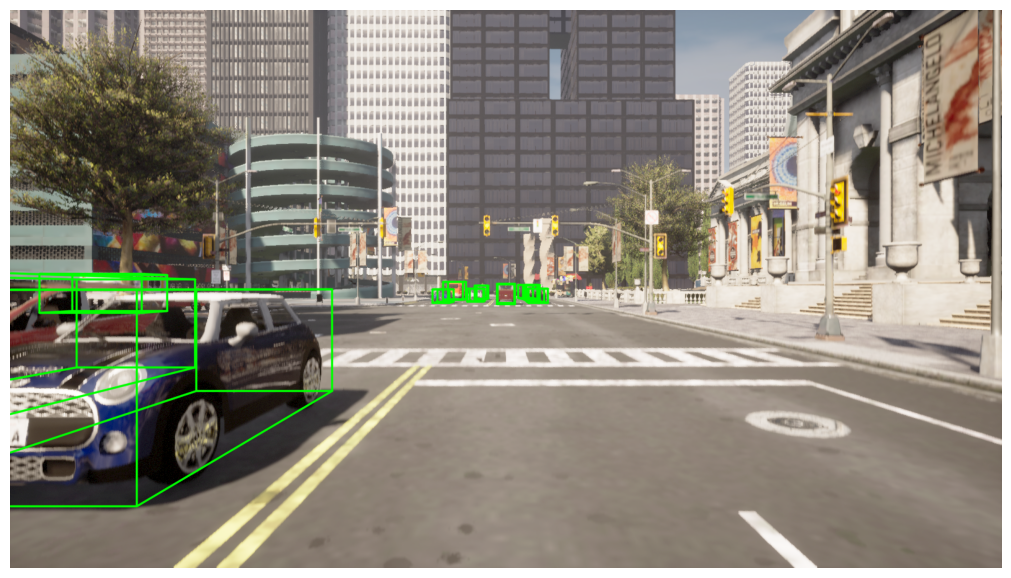

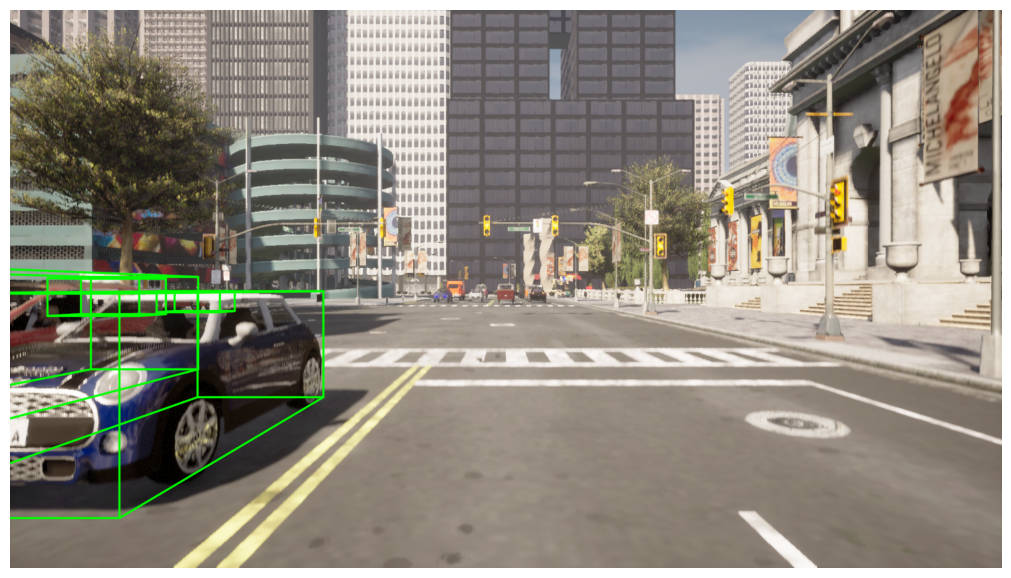

In [46]:
frame = 6
SM = CSM
SD = SM.get_scene_dataset_by_index(0)
img = SD.get_image(frame, sensor='main_camera')
pc = SD.get_lidar(frame, sensor='main_lidar', filter_front=True)
# dets = M2D(frame, img, 'dets2d')
dets = M3D(frame, pc, 'dets3d')
objs = SD.get_objects(frame, whitelist_types='all')
avapi.visualize.show_image_with_boxes(img, objs, inline=True)
avapi.visualize.show_image_with_boxes(img, dets, inline=True)

## Compute Statistics

In [70]:
dets

10 elements at frame 10, time 1.0
[Car detection from sensor dets2d
Box2D: [228.92, 182.80, 351.90, 251.61], Car detection from sensor dets2d
Box2D: [434.90, 176.48, 482.84, 211.59], Car detection from sensor dets2d
Box2D: [371.22, 184.05, 440.84, 222.62], Car detection from sensor dets2d
Box2D: [488.36, 177.28, 523.26, 203.76], Car detection from sensor dets2d
Box2D: [570.03, 176.10, 590.99, 189.63], Car detection from sensor dets2d
Box2D: [537.84, 177.77, 561.18, 196.56], Car detection from sensor dets2d
Box2D: [520.18, 178.52, 551.71, 199.17], Car detection from sensor dets2d
Box2D: [469.84, 181.32, 505.15, 206.86], Car detection from sensor dets2d
Box2D: [0.00, 130.21, 170.60, 314.73], Car detection from sensor dets2d
Box2D: [715.86, 152.83, 747.93, 187.06]]

In [53]:
SD.name

'KITTI'